In [1]:
import cv2
import numpy as np
from keras.models import model_from_json

from fer import Video
from fer import FER
import os
import sys
import pandas as pd

In [2]:
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

# 저장된 JSON 파일로 부터 모델 로드하기
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# 로드한 모델에 Weight 로드하기
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# webcam
#cap = cv2.VideoCapture(0)

#video
cap = cv2.VideoCapture("ha2.mov")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows

Loaded model from disk


<function destroyAllWindows>

  0%|                                                                                      | 0/559 [00:00<?, ?frames/s]

25-11-2021:20:19:26,782 INFO     [classes.py:199] 30.08 fps, 559 frames, 18.59 seconds
25-11-2021:20:19:26,788 INFO     [classes.py:207] Making directories at output
25-11-2021:20:19:26,794 INFO     [classes.py:352] Deleted pre-existing output\ha2_output.mov


 98%|██████████████████████████████████████████████████████████████████████████▋ | 549/559 [55:48<01:00,  6.10s/frames]


25-11-2021:21:15:15,388 INFO     [classes.py:320] Completed analysis: saved to output\ha2_output.mov
25-11-2021:21:15:15,388 INFO     [classes.py:327] Starting to Zip
25-11-2021:21:15:15,772 INFO     [classes.py:338] Compressing: 9%
25-11-2021:21:15:16,193 INFO     [classes.py:338] Compressing: 18%
25-11-2021:21:15:16,535 INFO     [classes.py:338] Compressing: 27%
25-11-2021:21:15:16,746 INFO     [classes.py:338] Compressing: 36%
25-11-2021:21:15:17,32 INFO     [classes.py:338] Compressing: 45%
25-11-2021:21:15:17,300 INFO     [classes.py:338] Compressing: 54%
25-11-2021:21:15:17,524 INFO     [classes.py:338] Compressing: 63%
25-11-2021:21:15:17,714 INFO     [classes.py:338] Compressing: 72%
25-11-2021:21:15:18,4 INFO     [classes.py:338] Compressing: 81%
25-11-2021:21:15:18,369 INFO     [classes.py:338] Compressing: 91%
25-11-2021:21:15:18,714 INFO     [classes.py:339] Zip has finished


,Human Emotions,Emotion Value from the Video
0,Angry,130.11
1,Disgust,31.05
2,Fear,23.27
3,Happy,43.30
4,Sad,293.97
5,Surprise,0.00
6,Neutral,26.77


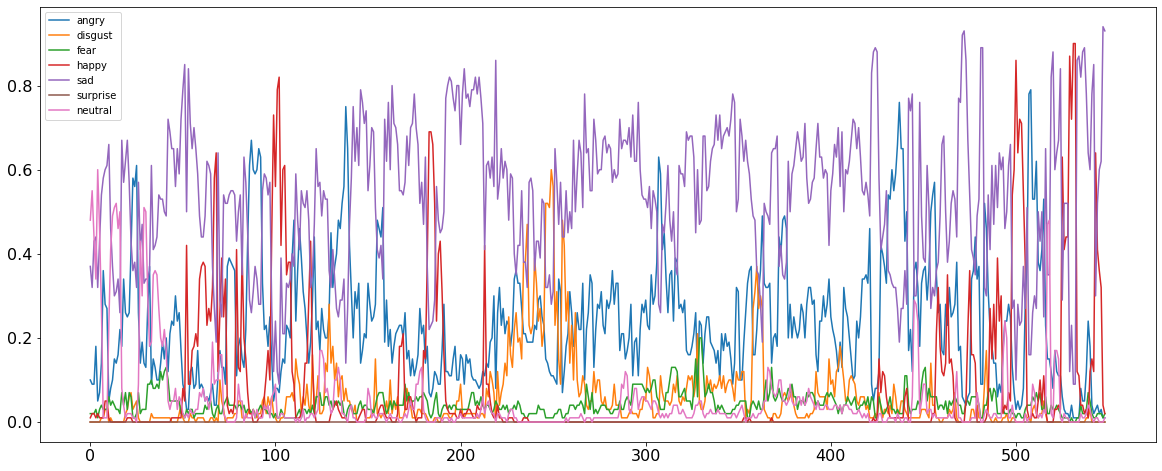

In [3]:
location_videofile = "ha2.mov"

face_detector = FER(mtcnn=True)
input_video = Video(location_videofile)

processing_data = input_video.analyze(face_detector, display=False)

vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fearful', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

In [18]:
negative_emotions = ['Angry', 'Disgust', 'Fearful', 'Sad']
general_emotions = ['Happy', 'Surprise', 'Neutral']
emotion_sum = sum(emotions_values)
negative_sum = angry + disgust + fear + sad
negative_ratio = negative_sum / emotion_sum
negative_ratio = round(negative_ratio, 2)
print(negative_ratio)
if negative_ratio >= 0.8:
    print("전문의와 상담 권유")
elif 0.4 <= negative_ratio < 0.8:
    print("스트레스 해소 권유")
else:
    print("정상")

0.8722446077269493
전문의와 상담 권유
